## Import Necessery Packages

In [144]:
# General use packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# For evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn import metrics

# For KFold cross validation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Preprocess the Data

In [145]:
dataset = pd.read_csv('Dataset_Firewall.csv')

## Visualize the Data

In [146]:
dataset.shape

(65532, 12)

In [147]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [148]:
dataset.tail()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0
65531,54867,445,0,0,drop,70,70,0,1,0,1,0


##### Column Names

In [149]:
dataset.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

##### Number of Columns

In [150]:
len(dataset.columns)

12

#### Actions Taken

In [151]:
pd.unique(dataset['Action'])

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

##### Dataset Type

In [152]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


## Label Encoding

In [153]:
le = LabelEncoder()
dataset['Action'] = le.fit_transform(dataset['Action'])

In [154]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,0,177,94,83,2,30,1,1
1,56258,3389,56258,3389,0,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,0,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,0,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,0,25358,6778,18580,31,16,13,18


In [155]:
dataset.tail()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65527,63691,80,13237,80,0,314,192,122,6,15,4,2
65528,50964,80,13485,80,0,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,2,70,70,0,1,0,1,0
65530,54870,445,0,0,2,70,70,0,1,0,1,0
65531,54867,445,0,0,2,70,70,0,1,0,1,0


## Dataset For KFold

In [156]:
x = dataset.drop('Action',axis=1)
y = dataset.loc[:,'Action']

## Train Test Split

In [157]:
random_seed = 86

train, test = train_test_split(dataset, test_size=0.1, shuffle=True, random_state=random_seed)

In [158]:
x_train = train.drop('Action',axis=1)
y_train = train.loc[:,'Action']

x_test = test.drop('Action',axis=1)
y_test = test.loc[:,'Action']

## KFold Create

In [189]:
strtfdKFold = StratifiedKFold(n_splits=10)
kf = KFold(n_splits=10)

# First Model

## K-NN Model Create

In [160]:
model_knn = KNeighborsClassifier(n_neighbors=1)

## K-NN Model Train

In [161]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## K-NN Model Test

In [162]:
predictions_knn = model_knn.predict(x_test)

predictions_knn

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [163]:
print(confusion_matrix(y_test, predictions_knn))

[[3762   15    0    1]
 [   6 1504    2    2]
 [   0    3 1253    0]
 [   2    3    0    1]]


##### Accuracy & Metrics

In [164]:
print(metrics.accuracy_score(y_test, predictions_knn))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_knn))

0.9948123283490998
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       0.99      0.99      0.99      1514
           2       1.00      1.00      1.00      1256
           3       0.25      0.17      0.20         6

    accuracy                           0.99      6554
   macro avg       0.81      0.79      0.80      6554
weighted avg       0.99      0.99      0.99      6554



##### Detailed Metrics

In [165]:
precision_knn = precision_score(y_test, predictions_knn, average='weighted')
recall_knn = recall_score(y_test, predictions_knn, average='weighted')
f1score_knn = f1_score(y_test, predictions_knn, average='weighted')

print(precision_knn)
print(recall_knn)
print(f1score_knn)

0.9946037390382999
0.9948123283490998
0.9946967332562319


# Second Model

## Decision Tree Model Create

In [198]:
model_dtree = tree.DecisionTreeClassifier(random_state=random_seed, max_depth=8)

## Decision Model Train

In [199]:
model_dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=86)

## KFold Test

In [192]:
score_strtfd_knn = cross_val_score(model_knn, x, y, cv=strtfdKFold)
score_kfold_knn = cross_val_score(model_knn, x, y, cv=kf)

print(score_strtfd_knn.mean())
print(score_kfold_knn.mean())

score_strtfd_dtree = cross_val_score(model_dtree, x, y, cv=strtfdKFold)
score_kfold_dtree = cross_val_score(model_dtree, x, y, cv=kf)

print(score_strtfd_dtree.mean())
print(score_kfold_dtree.mean())

score_strtfd_rf = cross_val_score(model_rf, x, y, cv=strtfdKFold)
score_kfold_rf = cross_val_score(model_rf, x, y, cv=kf)

print(score_strtfd_rf.mean())
print(score_kfold_rf.mean())

0.9920954098319278
0.9925379459174719
0.987701172398612
0.997604222950342
0.9827108726521396
0.995009995957471


## Decision Model Test

In [200]:
predictions_dtree = model_dtree.predict(x_test)

predictions_dtree

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [201]:
print(confusion_matrix(y_test, predictions_dtree))

[[3775    3    0    0]
 [   0 1512    2    0]
 [   0    0 1256    0]
 [   0    2    0    4]]


##### Accuracy & Metrics

In [202]:
print(metrics.accuracy_score(y_test, predictions_dtree))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_dtree))

0.9989319499542264
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       1.00      1.00      1.00      1514
           2       1.00      1.00      1.00      1256
           3       1.00      0.67      0.80         6

    accuracy                           1.00      6554
   macro avg       1.00      0.92      0.95      6554
weighted avg       1.00      1.00      1.00      6554



##### Detailed Metrics

In [172]:
precision_dtree = precision_score(y_test, predictions_dtree, average='weighted')
recall_dtree = recall_score(y_test, predictions_dtree, average='weighted')
f1score_dtree = f1_score(y_test, predictions_dtree, average='weighted')

print(precision_dtree)
print(recall_dtree)
print(f1score_dtree)

0.998478545797178
0.9984742142203235
0.9984683318833175


# Third Model

## Random Forest Model Create

In [173]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = random_seed)

## Random Forest Model Train

In [174]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=86)

## Random Forest Model Test

In [175]:
predictions_rf = model_rf.predict(x_test)

predictions_rf

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [176]:
print(confusion_matrix(y_test, predictions_rf))

[[3776    2    0    0]
 [   0 1511    2    1]
 [   0    3 1253    0]
 [   0    4    0    2]]


##### Accuracy & Metrics

In [177]:
print(metrics.accuracy_score(y_test, predictions_rf))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_rf))

0.9981690570643882
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       0.99      1.00      1.00      1514
           2       1.00      1.00      1.00      1256
           3       0.67      0.33      0.44         6

    accuracy                           1.00      6554
   macro avg       0.91      0.83      0.86      6554
weighted avg       1.00      1.00      1.00      6554



##### Detailed Metrics

In [178]:
precision_rf = precision_score(y_test, predictions_rf, average='weighted')
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f1score_rf = f1_score(y_test, predictions_rf, average='weighted')

print(precision_rf)
print(recall_rf)
print(f1score_rf)

0.9980216558880516
0.9981690570643882
0.9980435263672659


# Conclusion

## Visualize the Metrics

### Make Array From Accuracies

In [179]:
algorithm_names =['K-NN', 'Decision Tree', 'Random Forest']

acc_array = np.array([metrics.accuracy_score(y_test, predictions_knn),
                      metrics.accuracy_score(y_test, predictions_dtree),
                      metrics.accuracy_score(y_test, predictions_rf)])
acc_array = acc_array * 100

acc_array

array([99.48123283, 99.84742142, 99.81690571])

### Accuracy Graph

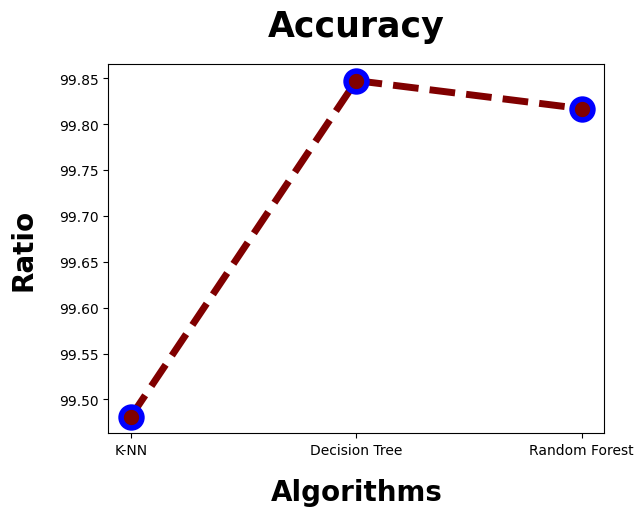

In [180]:
plt.plot(algorithm_names,
         acc_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Accuracy', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From Precisions

In [181]:
precision_array = np.array([precision_score(y_test, predictions_knn, average='weighted'),
                            precision_score(y_test, predictions_dtree, average='weighted'),
                            precision_score(y_test, predictions_rf, average='weighted')])
precision_array = precision_array * 100

### Precision Graph

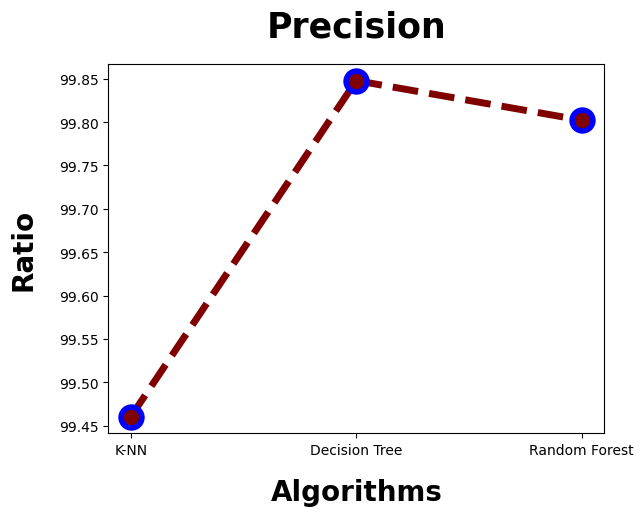

In [182]:
plt.plot(algorithm_names,
         precision_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Precision', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From Recall

In [183]:
recall_array = np.array([recall_score(y_test, predictions_knn, average='weighted'),
                        recall_score(y_test, predictions_dtree, average='weighted'),
                        recall_score(y_test, predictions_rf, average='weighted')])
recall_array = recall_array * 100

### Precision Graph

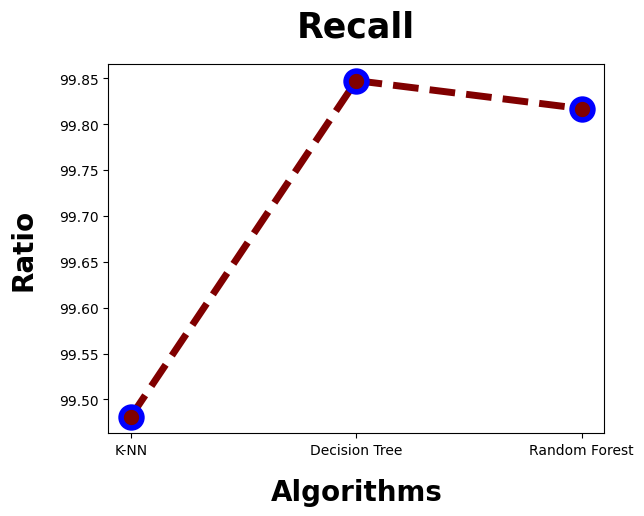

In [184]:
plt.plot(algorithm_names,
         recall_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Recall', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From F1 Score

In [185]:
f1score_array = np.array([f1_score(y_test, predictions_knn, average='weighted'),
                          f1_score(y_test, predictions_dtree, average='weighted'),
                          f1_score(y_test, predictions_rf, average='weighted')])
f1score_array = f1score_array * 100

### Precision Graph

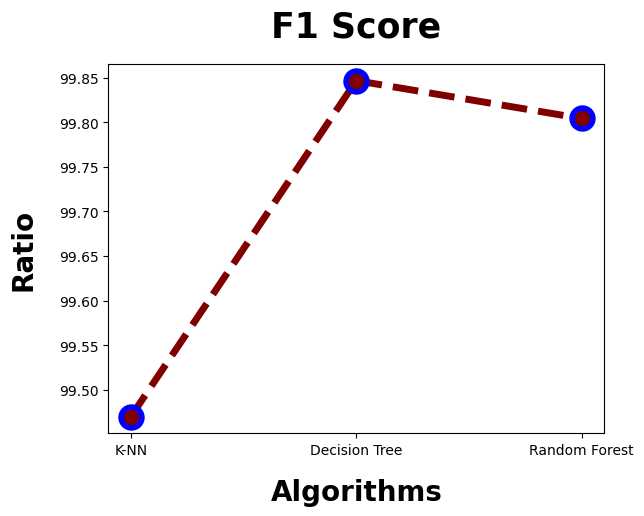

In [186]:
plt.plot(algorithm_names,
         f1score_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('F1 Score', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()